# Data Analysis Framework Example -- MLB Hitting

Patrick Ward

12/14/2019

In [58]:
## load packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as smf

In [5]:
## load data

Batting = pd.read_csv('/Users/Patrick/Desktop/Batting.csv')
Batting.head()

,playerID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
0,aardsda01,2004,1,SFN,NL,11,11.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
1,aardsda01,2006,1,CHN,NL,45,43.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0
2,aardsda01,2007,1,CHA,AL,25,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,aardsda01,2008,1,BOS,AL,47,5.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0
4,aardsda01,2009,1,SEA,AL,73,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


## Step 1: Research Question/Problem Statement

1) What is the relationship between hits (H) and runs batted in (RBI) in major league baseball players?

##### NOTES:

- Hypothesis: A higher number of H will lead to greater RBI in a season
- Potential limitations: Other variables may influence the relationship between H and RBI, requiring additional data for future analysis. For example, where in the batting order the batter hits, the number of opportunities the batter has to hit with runners in scoring position, the type of pitching the batter faced that season, etc.

## Step 2: Data Collection/Measurement Strategy

1) What type of data is required

- Data sources: Lahman Databases Batting table
- Data is available in the 'Lahman' package within R
- Data issues: Batting data is provided in the table from 1871 through 2016. Older seasons may be missing data.

2) Collection/Measurement

- No additional data needs to be collected at this time

3) Data Cleaning


In [21]:
# Change the data set from 'Batting' to df, to shorten the name for coding purposes

df = Batting

In [22]:
# how many seasons are there?

df.groupby(['yearID']).size()

yearID
1871     115
1872     156
1873     125
1874     123
1875     218
        ... 
2008    1385
2009    1249
2010    1245
2011    1240
2012    1406
Length: 142, dtype: int64

In [10]:
# check how many NAs there are in the H and RBI column

df[['H', 'RBI']].isna().sum()

H      6413
RBI    6837
dtype: int64

> Looks like there are no NA's in the H column but there are 424 in the RBI column. See what seasons these missing values are located in.

##### NOTE: there is a considerably larger number of NAs in this data set than the one directly in R (this is a slightly different data set that I have saved in a csv).

In [13]:
# Get rid of the rows with NA in those columns

df = df.dropna(subset = ['H', 'RBI'])

# check to see that it worked

df[['H', 'RBI']].isna().sum()

H      0
RBI    0
dtype: int64

In [32]:
df.shape

# We now have 89763 rows and 24 columns

(3891, 24)

> Looks like the missing values are only located in years 1882 and 1884.

> For the purposes of this analysis we will look at the mopre modern years and constrain ourselves to seasons 2010 and greater

In [23]:
# Get only 2010 or later

df = df[df['yearID'] > 2009]

In [24]:
df.groupby(['yearID']).size()

yearID
2010    1245
2011    1240
2012    1406
dtype: int64

Again, slightly different dataset that I had saved in .csv compared to what I pulled in from the R package. This is only data from 2010-2012 now.

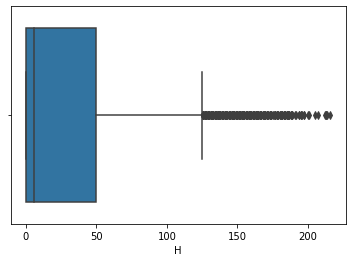

In [27]:
# boxplot of H

sns.boxplot(df['H'])

In [30]:
# quantile for H

df['H'].quantile(q = (0, 0.25, 0.5, 0.75, 1))

0.00      0.0
0.25      0.0
0.50      6.0
0.75     50.0
1.00    216.0
Name: H, dtype: float64

> We see that the data is vert right skewed, with a large number of players with a small number of ABs and then a bunch of players with a lot of ABs. This is why the median (thick black line insde of the box, representing the IQR) is so low relative to the mean (thick red line).

> Let's just concentracte on players with greater than or equal 50 ABs (the 75th percentile). Obviously this is going to change how we interpret our outcome given that players with lots of ABs will have more opportunities for hits and potentially more opportunities to generate runs.

In [33]:
df = df[df['H'] >= 50]

In [34]:
df.shape

# Now we have 948 rows and 24 columns for our analysis

(948, 24)

## Step 3: Visualize & Summarize Data

- Visuals of H and RBI

Text(0.5, 1.0, 'Season H Totals for Players with >= 171 AB (Seasons 2010-2012)')

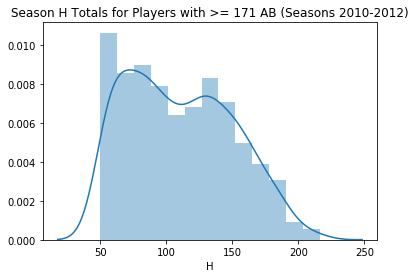

In [53]:
## Hits

sns.distplot(df['H']).set_title('Season H Totals for Players with >= 171 AB (Seasons 2010-2012)')

Text(0.5, 1.0, 'Season RBI Totals for Players with >= 171 AB (Seasons 2010-2012)')

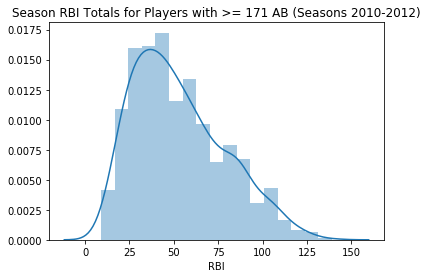

In [54]:
## RBI

sns.distplot(df['RBI']).set_title('Season RBI Totals for Players with >= 171 AB (Seasons 2010-2012)')

- Looks like the average number of hits in a season is around 100 and the average numnber of RBI is around 50.

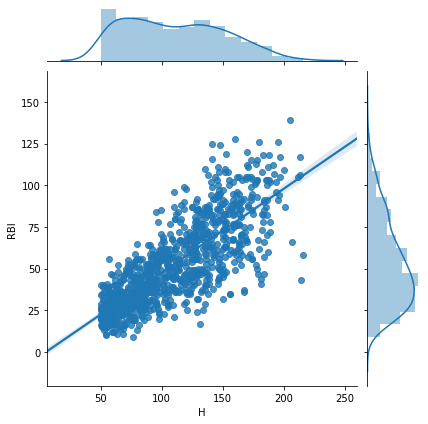

In [41]:
## Plot their relationship to each other

sns.jointplot(x = 'H', y = 'RBI', data = df, kind = 'reg')

- We can see a relationship between H and RBI
- Produce some summary statistics

In [51]:
# Mean

df[['H', 'RBI']].mean()

H      110.367089
RBI     52.909283
dtype: float64

In [52]:
# Standard Deviation

df[['H', 'RBI']].std()

H      40.060728
RBI    25.644104
dtype: float64

##### Mean & SD

- H = 110 ± 40
- RBI = 53 ± 26

In [57]:
## Calculare correlation

df[['H', 'RBI']].corr()

,H,RBI
H,1.000000,0.784741
RBI,0.784741,1.000000


The correlation between H and RBI is 0.78

## Step 4: Model Development/Interpretation

- We will just build a simple regression model for this example

In [64]:
# Identify dependent and independent variables

y = df['RBI']
X = df['H']

# add aa intercept to our model since the statsmodels package does not do that

X = smf.add_constant(X)

#  build the regression model
fit_lm = smf.OLS(y, X).fit()

In [65]:
# look at model output

fit_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    RBI   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     1516.
Date:                Sun, 15 Dec 2019   Prob (F-statistic):          1.01e-198
Time:                        06:38:56   Log-Likelihood:                -3966.8
No. Observations:                 948   AIC:                             7938.
Df Residuals:                     946   BIC:                             7947.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5322      1.515     -1.672      0.095      -5.504       0.440
H              0.5023      0.013     38.941      0.000       0.477       0.528
==============================================================================
Omnibus:                        9.856   Durbin-Watson:                   1.232
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               14.584
Skew:                           0.036   Prob(JB):                     0.000681
Kurtosis:                       3.603   Cond. No.                         344.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> The model explains about 62% of the variability observed in RBI.

> The coefficient for H suggests that for a one unit increase in H, on average we would see an approximate 0.50 increase in RBIs. Thus, 10 extra AB could lead to about 5 extra RBI (10 * 0.50).

## Step 5: Model Evaluation

- Plot model diagnostics

In [81]:
## Get model residuals and fitted values

fitted_y = fit_lm.fittedvalues
residuals = fit_lm.resid

[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Fitted')]

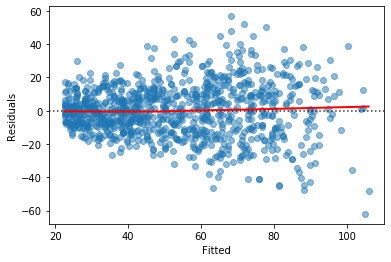

In [82]:
## Plot the fitted vs residuals

model_plot = sns.residplot(x = fitted_y, y = residuals,
             lowess = True,
             scatter_kws = {'alpha': 0.5},
             line_kws = {'color': 'red', 'lw': 2})

model_plot.set(xlabel = "Fitted", ylabel = "Residuals")

(array([  1.,  13.,  28., 120., 251., 280., 174.,  57.,  20.,   4.]),
 array([-61.96790536, -50.10084689, -38.23378842, -26.36672995,
        -14.49967148,  -2.63261301,   9.23444546,  21.10150392,
         32.96856239,  44.83562086,  56.70267933]),
 <a list of 10 Patch objects>)

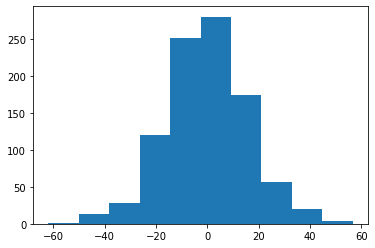

In [87]:
## Histogram of residuals

plt.hist(x = residuals)

Text(0.5, 1.0, 'Observed ~ Predicted RBI colored by the number of H a player had')

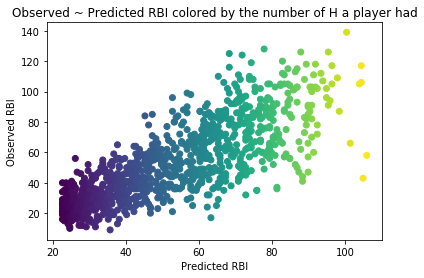

In [94]:
# Plot the relationship between predicted RBI and Actual RBI colored by number of H

plt.scatter(x = fitted_y, y = df['RBI'], c = df['H'])
plt.xlabel("Predicted RBI")
plt.ylabel("Observed RBI")
plt.title("Observed ~ Predicted RBI colored by the number of H a player had")

> A little fanning out in the pattern of the residuals againsts predicted values plot (first plot) indicating that the variance is not consistent across the range values. 

> The residuals appear to be approximately normally distributed around 0.

> The final plot shows us the predicted vs observed RBI. We can see that there is more variability in the predictions the further to the right you go (as the dots get lighter colored, indicating that player had more Hits that year). This is where the model is larger errors in the prediction.

In [107]:
# Calculate RMSE

sq_residuals = residuals**2
mean_sq_resid = sq_residuals.mean()
rmse = np.sqrt(mean_sq_resid)
rmse

15.886444114311203

## Step 6: Communication of Results

1) The research question was to examine the relationship between H and RBI in major league baseball players. It appears that there is a relationship between these two variables with more hits yielding a higher number of Runs. However, with an increase in hits the model predictions become more noisy.

2) Better predictions could be made with more data that can provide context around hits (situation, pitching, line up order, etc) and should be collected for future analysis.